_add text here_

In [2]:
# Write and run code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
airlines = pd.read_csv('datasets/airlines_final.csv')
banking = pd.read_csv('datasets/banking_dirty.csv')
restaurants = pd.read_csv('datasets/restaurants_L2_dirty.csv') 
ride_sharing = pd.read_csv('datasets/ride_sharing_new.csv')

## Data Type Constraints

|DataType       |Example                   |Python DataType|
|--------|      |--------|                 |---------------|
|Text Data       |First name, Last name, address       |str|
|Integers        |#Subscribers, #Products sold         |int|
|Decimals        |Temperature, $exchange rates, weights.  |float|
|Binary          |Is married, new customer, yes/no         |bool|
|Dates           |Order dates, birth dates, ship dates     |datetime|
|categories      |Marriage status, gender, educational level       |category|  


### Strings to integers

#import csv file and output header  
sales=pd.read_csv('sales.csv')  
sales.head(2)  

|       |SalesOrderID        |Revenue         |Quantity|
|------|   |---------|        |-------|        |--------|
|0         |43659             |23153$          |12|
|1         |43660             |1457$           |2|

### **To remove the $ from Revenue column**

```python
sales['Revenue'] = sales['Revenue'].str.strip('$')  
sales['Revenue'] = sales['Revenue'].astype('int') 
```

### verify that Revenue is now an integer

```python
assert sales['Revenue'].dtype. == 'int'
#convert to 'categorical'  
df['marriage_status'] = df['marriage_status'].astype('category')
```

## Numeric data or ... ?
In this exercise, and throughout this chapter, you'll be working with bicycle ride sharing data in San Francisco called ride_sharing. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The user_type column contains information on whether a user is taking a free ride and takes on the following values:

- 1 for free riders.
- 2 for pay per ride.
- 3 for monthly subscribers.
In this instance, you will print the information of ride_sharing using .info() and see a firsthand example of how an incorrect data type can flaw your analysis of the dataset. The pandas package is imported as pd.

### Instructions 

- Print the information of ride_sharing.
- Use .describe() to print the summary statistics of the user_type column from ride_sharing.
- Convert user_type into categorical by assigning it the 'category' data type and store it in the user_type_cat column.
- Make sure you converted user_type_cat correctly by using an assert statement.

In [4]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns

## Summing strings and concatenating numbers  

In the previous exercise, you were able to identify that category is the correct data type for user_type and convert it in order to extract relevant statistical summaries that shed light on the distribution of user_type.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column duration to the type int. Before that however, you will need to make sure to strip "minutes" from the column in order to make sure pandas reads it as numerical. The pandas package has been imported as pd.

### Instructions

- Use the .strip() method to strip duration of "minutes" and store it in the duration_trim column.
- Convert duration_trim to int and store it in the duration_time column.
- Write an assert statement that checks if duration_time's data type is now an int.
- Print the average ride duration.

In [5]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


## Data range constraints 

**Motivation**

```python
movies.head()
```

|       |Movie_name        |avg_rating|
|------|   |---------|        |-------|
|0         |The Godfather             |5|
|1         |Frozen             |3|
|...       |Shrek              |4|

```python
# import date time  
import datetime as dt  
today_date = dt.date.today()  
user_signups[user_signups['subsrciption_date'] > dt.date.today()] 
```

Rating can be anywhere between 1 and 5. After creating the histogram with matplotlib; we observed that some movies have an average rating of 6.

## How to deal with out of range data?
- Dropping
- Setting custom minimums and maximums
- Treat as missing and impute
- setting custom value depending on business assumptions

### Movie Example
```python
import pandas as pd  
# output movies with rating > 5  
movies[movies['avg_rating'] > 5]
#drop values using filtering  
movies = movies[movies['avg_rating'] <= 5]   
#drop values using '.drop()'   
movies.drop(movies[movies['avg_rating']>5].index, inplace=True)  
assert movies['avg_rating'].max() <= 5  
#convert avg_rating > 5 to 5  
movies.loc[movies['avg_rating'] >5, 'avg_rating'] =5    
#Assert statement  
assert movies['avg_rating'] <=5 
```

### Date range example
```python
import datetime as dt  
import pandas as pd  
#output data types  
user_signups.dtypes
``` 

```python
#  convert to date 
user_signups['subscription_date']=pd.to_datetime(user_signups['subscription_date']).dt.date  
today_date = dt.date.today()
```
  
```python
### **Drop the data**
#drop values using filtering  
user_signups = user_signups[user_signups['subscription_date']>today_date]  
#drop values using '.drop()'  
user_signups.drop(user_signups[user_signups['subscription_date']>today_date].index, inplace = True)
```  
  
```python
#Hardcode dates with upper limit
#Drop values using filtering  
user_signups.loc[user_signups['subscription_date']>today_date, 'subscription_date'] = today_date
```

```python
#Assert is true  
assert user_signups.subcription_date.max().date() <= today_date
```

## Tire size constraints 

In this lesson, you're going to build on top of the work you've been doing with the ride_sharing DataFrame. You'll be working with the tire_sizes column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

### Instructions

- Convert the tire_sizes column from category to 'int'.
- Use .loc[] to set all values of tire_sizes above 27 to 27.
- Reconvert back tire_sizes to 'category' from int.
- Print the description of the tire_sizes.

In [5]:
print(ride_sharing.dtypes)
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes']> 27, 'tire_sizes'] = 27


# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

Unnamed: 0          int64
duration           object
station_A_id        int64
station_A_name     object
station_B_id        int64
station_B_name     object
bike_id             int64
user_type           int64
user_birth_year     int64
user_gender        object
dtype: object


## Back to the future 

A new update to the data pipeline feeding into the ride_sharing DataFrame has been updated to register each ride's date. This information is stored in the ride_date column of the type object, which represents strings in pandas.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the ride_date column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert ride_date to a datetime object.

The datetime package has been imported as dt, alongside all the packages you've been using till now.

### Instructions

- Convert ride_date to a datetime object using to_datetime(), then convert the datetime object into a date and store it in ride_dt column.
- Create the variable today, which stores today's date by using the dt.date.today() function.
- For all instances of ride_dt in the future, set them to today's date.
- Print the maximum date in the ride_dt column.

In [ ]:
# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

## Uniqueness constraints

##**Duplicate values**
All columns have the same values
|first_name |last_name.   |address                         |height        |weight|
|---------- |-----------  |----------------------          |------        |-------|
|justin      |Saddlemyer     |Boulevard du Jardin Botanique 3, Bruxelles        |193 cm    |87 kg| 
|justin      |Saddlemyer     |Boulevard du Jardin Botanique 3, Bruxelles        |193 cm    |87 kg| 

### Why do this (duplicates) happen?
- Data entry and human error
- Join or merge errors
- Bugs and desogn errors

### How to find duplicate values
- #Get duplicates across all columns
`duplicates = height_weight.duplicated()`  
`print(duplicates)` 
`height_weigh[duplicates]`  

### How to find duplicate rows?
#### The .duplicated() method
**The arguments** 
- subset: List of columns names to check for duplication
- keep: Whether to keep first ('first'), last('last') or all (False) duplicate values

#### column names to check for duplication  
`column_names = ['first_name', 'last_name', 'address']`  
`duplicates = height_weight.duplicated(subset=column_names, keep=False)` 
#### output duplicate values  
`height_weight[duplicates].sort_values(by='first_name')`   

#### How to treat duplicate values?
1.  The .drop_duplicates() method
**The arguments** 
- subset: List of columns names to check for duplication
- keep: Whether to keep first ('first'), last('last') or all (False) duplicate values. **Takes in first as default.**
- inplace: drop duplicated rows directly inside DataFrame without creating new object (True).

#### Drop duplicates (complete)

`height_weight.drop_duplicates(inplace=True)`  

  
```python
column_names = ['first_name', 'last_name', 'address']
duplicates = height_weight.duplicated(subset=column_names, keep=False) 
height_weight[duplicates].sort_values(by='first_name')
```

2. The .groupby() and .agg() methods

### Group by column names and produce statistical summaries

```python
column_names = ['first_name', 'last_name', 'address']   
summaries ={'height': 'max', 'weight': 'mean'}
height_weight = height_weight.groupby(by=column_names).agg(summaries).reset_index()   
#make sure aggregation is done  
duplicates = height_weight.duplicated(subset=column_names, keep=False) 
height_weight[duplicates].sort_values(by='first_name')```

## Finding duplicates
A new update to the data pipeline feeding into ride_sharing has added the ride_id column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of ride_sharing is in your environment, as well as all the packages you've been working with thus far.

### Instructions

- Find duplicated rows of ride_id in the ride_sharing DataFrame while setting keep to False.
- Subset ride_sharing on duplicates and sort by ride_id and assign the results to duplicated_rides.
- Print the ride_id, duration and user_birth_year columns of duplicated_rides in that order.

In [2]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='ride_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

## Treating duplicates
In the last exercise, you were able to verify that the new update feeding into ride_sharing contains a bug generating both complete and incomplete duplicated rows for some values of the ride_id column, with occasional discrepant values for the user_birth_year and duration columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average duration, and the minimum user_birth_year for each set of incomplete duplicate rows.

### Instructions

- Drop complete duplicates in ride_sharing and store the results in ride_dup.
- Create the statistics dictionary which holds minimum aggregation for user_birth_year and mean aggregation for duration.
- Drop incomplete duplicates by grouping by ride_id and applying the aggregation in statistics.
- Find duplicates again and run the assert statement to verify de-duplication.

In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## Membership Constraints

### Text and Categorical data

|Type of data                    |Example values               |Numeric representation|
|:-----------                    |:-------------                |:----------------------|
|Marriage Status                 |unmarried, married            | 0,1|
|Household income category       |0-20k, 20-40k,...             |0,1,...|
|Loan status                     |default, payed, no-loan       |0,1,2|

### Why could we have these problems?
- Data Entry Erros
Free text
Dropdowns
Parsing Errors

### How do we treat these problems?
- Dropping data
- Remapping categories
- Inferring Categories

### Finding inconsistent categories
```python
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type']) 
print(inconsistent_categories) 
``` 

### Get and print rows with inconsistent categories 

```python
inconsistent_rows = study_data['blood_tyoe'].isin(inconsistent_categories)  
study_data[inconsistent_rows]
```

### Dropping inconsistent categories

```python
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])  
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
inconsistent_data = study_data[inconsistent_rows]
#Drop inconsistent categories and get consistent data only  
consistent_data = study_data[~inconsistent_rows]```

## Finding consistency
In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.

### Instructions 
- Print the categories DataFrame and take a close look at all possible correct categories of the survey columns.
- Print the unique values of the survey columns in airlines using the .unique() method.
- Create a set out of the cleanliness column in airlines using set() and find the inconsistent category by finding the difference in the cleanliness column of categories.
- Find rows of airlines with a cleanliness value not in categories and print the output.
- Print the rows with the consistent categories of cleanliness only.

In [2]:
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])
# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

## Categorical Variables

### What type of errors could we have?
### Value inconsistency  
- Inconsistent fields: `'married'`, `'Maried'`, `'UNMARRIED'`, `'not married'`, ...  
- Trailing white spaces: `'Maried '`, `' maried'`, ...  
### Collapsing too many categories to few
- creating new groups:`'0-20k'`, `'20-40k'` categories ... from continuous household income data  
- mapping groups to new ones: Mapping household income categories to 2 `'rich'`, `'poor'`   
- Making sure data is of type `'category'`
### Value consistency  
- Capitalization: `'married'`, `'Married'`, `'UNMARRIED'`, `'unmarried'`  
### Get marriage status column
`marriage_status = demographics['marriage_status']`
`marriage_status.value_counts()`  
N.B: `value_counts()` works on series only not on DataFrame  
### Get value counts on DataFrame  
`marriage_status.groupby('marriage_status').count()`
### capitalize  
`marriage_status['marriage_status'] = marriage_status['marriage_status'].str.upper()`  
`marriage_status['marriage_status'].value_counts()`  

### Lowercase  
`marriage_status['marriage_status'] = marriage_status['marriage_status'].str.lower()`  
`marriage_status['marriage_status'].value_counts()`  
- Trailing Spaces: 'married ', ' married', ' unmarried', '  unmarried' ...  
### Get marriage status column
`marriage_status['marriage_status'] = demographics['marriage_status']`  
`marriage_status['marriage_status'].value_counts()`  

### Strip all spaces
`demographics = demographics['marriage_status'].str.strip()`  
`demographics['marriage_status'].value_counts()`

### Collapsing data into categories. 
- **Create categories out of data: income_group, column from income column**

### Using qcut
 `import pandas as pd`  
 `group_names = ['0-200k', '200k-500k', '500k+']`   
 `demographics['income_group'] = pd.qcut(demographics['household_income'], q=3, labels=group_names)`  
-  **print income_group column**  
 `demographics[['income_group', 'household_income']]`   
### Using cut(): create category ranges and names
 `ranges = [0,200000, 500000, np.inf]`  
 `group_names = ['0-200k', '200k-500k', '500k+']`
- **Create income group column**
`demographics['income_group'] = pd.cut(demographics['household_income'], bins=rnges, labels=group_names)`   
`demographics[['income_group', 'household_income']]`   

|       |Category        |Income|
|------|   |---------|        |-------|
|0         |0-200k             |189243|
|1         |500k             |778533|

- **Map categories to fewer ones: reducing categories in categorical column**
Operating_system column is `'microsoft'`, `'MacOS'`, `'IOS'`, `'Android'`, `'Linux'`  
operating_system column should become: `'DesktopOS'`, `'MobileOS'`  
- **Create mapping dictionary and replace** 
`mapping = {'Microsoft': "DesktopOS", 'Linux':"DesktopOS", 'IOS':'MobileOS', 'Android': 'MobileOS'}`  
`devices['operating_system'] = devices['operating_system'].replace(mapping)`    
`devices['operating_system'].unique()`  

## Inconsistent categories 

In this exercise, you'll be revisiting the airlines DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, dest_region and dest_size respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the airlines DataFrame is in your environment.

### Instructions

- Print the unique values in dest_region and dest_size respectively.
- Change the capitalization of all values of dest_region to lowercase.
- Replace the 'eur' with 'europe' in dest_region using the .replace() method.

In [2]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium

## Remapping categories
To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.
The pandas and numpy packages have been imported as pd and np. Let's create some new categorical data!

### Instructions

- Create the ranges and labels for the wait_type column mentioned in the description.
- Create the wait_type column by from wait_min by using pd.cut(), while inputting label_ranges and label_names in the correct arguments.
- Create the mapping dictionary mapping weekdays to 'weekday' and weekend days to 'weekend'.
- Create the day_week column by using .replace().

In [3]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

## Cleaning Text Data
### What is text data
|Type of data |Example Values|
|:-----------   |--------------:|
|Names         |Alex, Sara, ...|
|Phone Numbers  |+96171679912,...|
|Emails         |'adel@datacamp.com'|
|Password        |...|

### Common text data problems 
- Data inconsistency: +96171679912 or 0096171679912 or ...?
- Fixed length violations: password needs to be at least 8 characters
- Typos: +961.71.679912

### Example
`phones=pd.read_csv('phones.csv')`  
`print(phones)`  
|          |Full name         |Phone number|
|---------   |---------       |------------|
|0           | Noelani A. Gray     |001-702-397-5143|
|1           | Myles Z. Gomez     |001-329-485-0543|
|2           | Gil B. Silva     |001-195-492-2338|
|3           | Prescott D. Hardin     |+1-297-996-4904|
|4           |Benedict G. Valdez     |001-969-820-3536|
|5           | Reece M. Andrews     |4138|
|6           | Hayfa E. Keith    |001-536-175-8444|
|7           | Hedley I. Logan     |001-681-552-1823|
|8           | Jack W. Carrillo     |001-910-323-5265|
|9           | Lionel M. Davis     |001-143-119-9210|

### Fixing the phone number column
### Replace '+' with '00'
`phones['phone number'] = phones['phone number'].str.replace('+', '00')`  
`phones`  
|          |Full name         |Phone number|
|---------   |---------       |------------|
|0           | Noelani A. Gray     |001-702-397-5143|
|1           | Myles Z. Gomez     |001-329-485-0543|
|2           | Gil B. Silva     |001-195-492-2338|
|3           | Prescott D. Hardin     |001-297-996-4904|
|4           |Benedict G. Valdez     |001-969-820-3536|
|5           | Reece M. Andrews     |4138|
|6           | Hayfa E. Keith    |001-536-175-8444|
|7           | Hedley I. Logan     |001-681-552-1823|
|8           | Jack W. Carrillo     |001-910-323-5265|
|9           | Lionel M. Davis     |001-143-119-9210|

### Replace "-" with nothing
`phones['phone number'] = phones['phone number'].str.replace("-", "")`  
`phones`  
|          |Full name         |Phone number|
|---------   |---------       |------------|
|0           | Noelani A. Gray     |0017023975143|
|1           | Myles Z. Gomez     |0013294850543|
|2           | Gil B. Silva     |0011954922338|
|3           | Prescott D. Hardin     |0012979964904|
|4           |Benedict G. Valdez     |0019698203536|
|5           | Reece M. Andrews     |4138|
|6           | Hayfa E. Keith    |0015361758444|
|7           | Hedley I. Logan     |0016815521823|
|8           | Jack W. Carrillo     |0019103235265|
|9           | Lionel M. Davis     |0011431199210|

### Replace phone numbers with lower than 10 digits to NaN
 `digits = phones['phone number'].str.len()`  
 `phones.loc[digits < 10, 'phone number'] = np.nan`  
 `phones`  
 |          |Full name         |Phone number|
|---------   |---------       |------------|
|0           | Noelani A. Gray     |001-702-397-5143|
|1           | Myles Z. Gomez     |001-329-485-0543|
|2           | Gil B. Silva     |001-195-492-2338|
|3           | Prescott D. Hardin     |001-297-996-4904|
|4           |Benedict G. Valdez     |001-969-820-3536|
|5           | Reece M. Andrews     |NaN|
|6           | Hayfa E. Keith    |001-536-175-8444|
|7           | Hedley I. Logan     |001-681-552-1823|
|8           | Jack W. Carrillo     |001-910-323-5265|
|9           | Lionel M. Davis     |001-143-119-9210|
 
### Fixing the phone number column
### Find the length of each row in phone nyumber column
`sanity_check = phone['phone number'].str.len()`  
- #Assert minimum phone number length is 10
`assert sanity_check.min() >= 10`  
- **Assert all numbers do not have '+' or '-'**
`assert phone['phone number'].str.contains("+|-").any() == False`  
### But what about more complicated examples?
|          |Full name         |Phone number|
|---------   |---------       |------------|
|0           | Olga Robinson     |+(01706)-25891|
|1           | Justina Kim     |+0500-571437|
|2           | Tamekah Henson     |+0800-1111|
|3           | Miranda Solis     |+07058-879063|
|4           |Caldwell Gilliam     |+(016977)-8424|

- **Replace letters with nothing**
`phones['phone number'] =phones['phone number'].str.replace(r'\D+', '')`  
|          |Full name         |Phone number|
|---------   |---------       |------------|
|0           | Olga Robinson     |0170625891|
|1           | Justina Kim     |0500571437|
|2           | Tamekah Henson     |08001111|
|3           | Miranda Solis     |07058879063|
|4           |Caldwell Gilliam     |0169778424|

## Removing titles and taking names
While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".

Your ultimate objective is to create two new columns named first_name and last_name, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The airlines DataFrame is in your environment, alongside pandas as pd.

### Instructions

- Remove "Dr.", "Mr.", "Miss" and "Ms." from full_name by replacing them with an empty string "" in that order.
- Run the assert statement using .str.contains() that tests whether full_name still contains any of the honorifics.

In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss", "")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.", "")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

## Keeping it descriptive  

To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the survey_response column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an assert statement.

The airlines DataFrame is in your environment, and pandas is imported as pd.

### Instructions

- Using the airlines DataFrame, store the length of each instance in the survey_response column in resp_length by using .str.len().
- Isolate the rows of airlines with resp_length higher than 40.
- Assert that the smallest survey_response length in airlines_survey is now bigger than 40.

In [ ]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]


# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

## Uniformity

|Column      |Unit|
|:--------     |:-----|
|Temperature   |32oC is also 89.6oF|
|Weight         |70Kg is also 11st|
|Date           |26-11-2019 is also 26 November, 2019|
|Money          |100$ is also 10763.Yen|

An example
```python
temperatures = pd.read_csv('temperature.csv')  
temperatures.head()
``` 
|       | Date     |Temperature|
|------- |------    |-----------|
|0       | 03.03.19  |14.0|
|1       | 04.03.19  |15.0|
|2       | 05.03.19  |18.0|
|3       | 06.03.19  |16.0|
|4       | 07.03.19  |62.0|  

```python
#Import matplotlib 
import matplotlib.pyplot as plt
#create scatter plot.
plt.scatter(x='Date', y='Temperature', data='Temperature')
#Create title, xlabel and ylabel
plt.titlt('Temperatre in Celsius March 2019 -NyC') 
plt.xlabel('Dates')
plt.ylabel('Temperature in Celsius')
#show plot 
plt.show() 
``` 

### Treating Temperature data

$C =(F-32) \times 5/9$ 
```python 
temp_fah =temperature.loc[temperatures['temperature'] > 40, 'Temeperature']
temp_cels = (temp_fah-32) *(5/9)
temperature.loc[temeperatures['Temperature'] > 40, 'Temperature'] = temp_cels
#Assert conversion is correct  
assert temperatures['Temperature'].max() < 40 
```

### Treating date data  

`birthdays.head()`  

|       | Birthday     |First name    |Last name|
|------- |------    |-----------      |---------|
|0       | 27/27/19  |Rowan            |Nunez| 
|1       | 03-29-19  |Brynn             |Yang|
|2       | March 3rd, 2019  |Sophia     |Reilly|
|3       | 24-03-19  |Deacon             |Prince|
|4       | 06-03-19  |Griffith            |Neal| 

### Datetime Formatting
`datetime` is useful for representing dates  
|Date    |datetime format|
|------   |--------------|
|25-12-2019     |%d-%m-%Y|
|December 25th 2019      |%c|
|12-25-2019       |%m-%d-%Y|
|...        |...|

### `pandas.to_datetime`  
- Can recognize most formats automatically
- Sometimes fails with erroneous or unrecognisable formats 

```python
# convert to datetime - but won't work! 
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'])  
# ValueError: month must be in 1..12  
# Will work!
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'],  
# attempt to infer formate of each date  
infer_datetime_format = True,  
# Return NA for rows where conversion failed  
errors =('coerce')    
birthdays.head()
``` 

|       | Birthday     |First name    |Last name|
|------- |------    |-----------      |---------|
|0       | NaT  |Rowan            |Nunez| 
|1       | 2019-03-29  |Brynn             |Yang|
|2       | 2019-03-03  |Sophia     |Reilly|
|3       | 2019-03-24  |Deacon             |Prince|
|4       | 2019-06-03  |Griffith            |Neal| 

```python
# Using `dt.strftime` method
birthdays['Birthday'] = birthdays['Birthday'].dt.strftime('%d-%m-%Y') 
birthdays.head() 
```
### Treating ambiguous date data
Is `2019-03-08` in August or in March?  
- Convert to NA and treat accordingly
- Infer format by understanding data source
- Infer format by understanding previous and subsequent data in DataFrame

## Uniform currencies 

In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts (acct_amount), their currency (acct_cur), amount invested (inv_amount), account opening date (account_opened), and last transaction date (last_transaction) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

### Instructions

- Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.
- Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
- Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.

In [2]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

## Uniform dates
After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.

### Instructions 

- Print the header of account_opened from the banking DataFrame and take a look at the different results.
- Convert the account_opened column to datetime, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.

In [4]:
# Print the header of account_opened
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object
0   2018-02-09
1   2019-02-28
2   2018-04-25
3   2017-07-11
4   2018-05-14
Name: account_opened, dtype: datetime64[ns]
0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


## Cross Validation
This is the use of multiple fields in a dataset to sanity check data integrity.

### Example
```python
import pandas as pd
flights=pd.read_csv('flights.csv')
flights.head()
``` 
|   |flight_number         |economy_class        |business_class          |first_class                |total_passengers|
|---  |-----------         |--------------       |--------------          |-----------                |----------------|
|0     |DL140               |100                  |60                     |40                   |200|
|1     |BA248               |130                  |100                     |70                   |300|
|2     |MEA124               |100                  |50                     |50                   |200|
|3     |AFR939              |140                  |70                     |90                   |300|
|4     |TKA101               |150                  |100                     |20                   |250|

Using the table above; sum the different classes of passengers to ensure they sum up to the number of total passengers  
```python
sum_classes=flights[['economy_class', 'business_class', 'first_class']].sum(axis=1) 
**#find instances where total passenger column is equal to the number of the classes**   
passenger_equ = sum_classes == flights['total_passengers'] 
**#Find and filter out rows with inconsistent passengers totals**    
inconsistent_pass = flights[~passenger_equ]  
consistent_pass = flights['passenger_equ']
```

## Another Example

```users.head()``` 

|   |user_id         |Age       |Birthday|                     
|---  |-----------         |--------------       |--------------|          
|0     |32985                |22                  |1998-03-02|     
|1     |94387               |27                  |1993-12-04|     
|2     |34236               |42                  |1978-11-24|     
|3     |12551              |31                  |1989-01-03|           
|4     |55212               |18                  |2002-07-02|          
 
### Check whether the `Age` and `Birthday` columns tally

```python
# convery to datetime and get today's date  
users['Birthday'] = pd.to_datetime(users['Birthday'])  
# create an object to store today's date   
today = dt.date.today()  
# For each row in the Birthday column, calculate year difference  
age_manual = today.year - users['Birthday'].dt.year 
# Find instances where ages match    
age_equ = age_maual == users['Age']  
# Find and filter out rows with inconsistent age 
inconsistent_age = users[~age_equ]  
consistent_age = users[age_equ] 
```

## What to do when we have inconsistencies?

Just like other data cleaning problem, there's no one-size-fits-all solution. Often, the best solution requires in-depth understanding of our dataset . We can decide to either
- Drop missing data.
- Set it to missing and impute.
- Apply rules from domain knowledge.

## Cross field or no cross field?
Throughout this course, you've been immersed in a variety of data cleaning problems from range constraints, data type constraints, uniformity and more.

In this lesson, you were introduced to cross field validation as a means to sanity check your data and making sure you have strong data integrity.

Now, you will map different applicable concepts and techniques to their respective categories.

**Instructions**

Map different applicable concepts and techniques to their respective categories. 

**Solutions**  


|cross field Validation         |Not cross field Validation|                     
|-----------                    |--------------|          
|confirming the ages provided by users by cross checking their birthdays        |The use of `.astype()` method|     
|Row-wise operations such as `.sum(axis=1)`      |Making sure that a revenue column is a numeric column|
|                            |Making sure a `subscription_date` column has no values set in the future|    



## How's our data integrity?
New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.

### Instructions 

- Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.
- Store the values of banking with consistent inv_amount in consistent_inv, and those with inconsistent ones in inconsistent_inv.
- Store today's date into today, and manually calculate customers' ages and store them in ages_manual.
- Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.

In [2]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [7]:
print(banking)
import datetime as dt
banking['birth_date'] = pd.to_datetime(banking['birth_date'])
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

    Unnamed: 0   cust_id birth_date  ...   fund_D  account_opened  last_transaction
0            0  870A9281 1962-06-09  ...  15632.0        02-09-18          22-02-19
1            1  166B05B0 1962-12-16  ...   2421.0        28-02-19          31-10-18
2            2  BFC13E88 1990-09-12  ...   1185.0        25-04-18          02-04-18
3            3  F2158F66 1985-11-03  ...  12830.0        07-11-17          08-11-18
4            4  7A73F334 1990-05-17  ...  18383.0        14-05-18          19-07-18
..         ...       ...        ...  ...      ...             ...               ...
95          95  CA507BA1 1974-08-10  ...   4943.0        26-05-18          11-09-19
96          96  B99CD662 1989-12-12  ...   7258.0        04-05-17          12-03-19
97          97  13770971 1984-11-29  ...   8577.0        16-08-17          24-04-19
98          98  93E78DA3 1969-12-14  ...   5080.0        09-10-17          15-04-18
99          99  AC91D689 1993-05-18  ...   5333.0        01-08-17          0

## Completeness 

## What is missing data? 
Missing data is when no data value is stored for a variable in an observation. Can be represented as `NA`, `nan`, `0`, `...`. Missing data is commonly due to technical or human error.

### Airquality Example
`import pandas as pd`  
`airquality = pd.read_csv('airquality.csv')`  
|    |Date               |Temperature      |CO2|
|--  |-----              |----------       |---|
|987 |20/04/2004         |16.8             |0.0|
|2119 |07/06/2004         |18.7             |0.8|
|2451 |20/06/2004         |-40.0             |NaN|
|1984 |01/06/2004         |9.6             |1.8|
|8299 |19/02/2004         |11.2             |1.2|
|... |...         |...            |...|

### Return missing values
`airquality.isna()`  
|    |Date               |Temperature      |CO2|
|--  |-----              |----------       |---|
|987 |False         |False             |False|
|2119 |False         |False             |False|
|2451 |False         |False             |True|
|1984 |False         |False             |False|
|8299 |False         |False             |False|

### Get summary of missingness
`airquality.isna().sum()`  
|         |  |
|------   |--|
|Date     |0|
|Temperature  |0|
|CO2          |366|
|dtype: int64  |  |

## `missingno`  
The `missingno` package allows us to create useful visualisation for understanding missing data.

`import missingno as msno`  
`import matplotlib.pyplot as plt`  
`msno.matrix(airquality)`   
`plt.show()`  
### isolate missing and complete values aside  
`missing = airquality[airquality['CO2'].isna()]`  
`complete = airquality[~airquality['CO2'].isna()]`  
#Describe complete DataFrame  
`complete.describe()`  
|    |Temperature     |CO2|
|---  |--------       |----|
|count    |8991.000000  |8991.000000|
|mean     |18.317829    |1.739584|  
|std      |8.832116     |1.537580|
|min      |-1.900000    |0.000000|
|...      |...          |...|
|max      |44.600000    |11.900000| 

#Describe missing DataFrame  
`missing.describe()`  
|    |Temperature     |CO2|
|---  |--------       |----|
|count    |366.000000  |0.0|
|mean     |-39.655738    |NaN|  
|std      |5.988716     |NaN|
|min      |-41.000000    |NaN|
|...      |...          |...|
|max      |-30.000000    |NaN| 

#confirm visually with the missingno package  
`#sort by the temperature column`  
`sorted_airquality = airquality.sort_values(by='Temperature')`  
`msno.matrix(sorted_airquality)`  
`plt.show()`  
## Missingness types
- Missing completely at Random (MCAR)
1. No systematic relationship between missing data and other values.
2. Data entry errors when imputting data

- Missing at Random (MAR)  
1. Systematic relationship between missing data and other observed values.
2. Missing ozone data for high temperatures.

- Missing Not at Random (MNAR)  
1. Systematic relationship between missing data and unobserved values.
2. Missing temperature values for high temperatures

## How to deal with missing data?
- Simple approaches
1. Drop missing data
2. Impute with statistical measures (mean, median, mode)

- More Complex approaches 
1. imputing using an algorithmic approach
2. Impute with machine learning models

Each missingness type requires a specific approach and each type of approach has drawbacks and positives.
## Dealing with missing data
airquality.head()

|    |Date               |Temperature      |CO2|
|--  |-----              |----------       |---|
|0 |05/03/2005         |85             |2.5|
|1 |23/08/2004         |21.8             |0.0|
|2 |18/02/2005         |6.3             |1.0|
|3 |08/02/2005         |-31.0             |NaN|
|4 |13/03/2005         |19.0             |0.1|

## Drop missing values. 
`airquality_dropped = airquality.dropna(subset=['CO2'])`  
`airquality_dropped.head()`  
|    |Date               |Temperature      |CO2|
|--  |-----              |----------       |---|
|0 |05/03/2005         |85             |2.5|
|1 |23/08/2004         |21.8             |0.0|
|2 |18/02/2005         |6.3             |1.0|
|4 |13/03/2005         |19.0             |0.1|
|5 |02/04/2005         |17.0             |0.8|

## Replacing with statistical measures 
`co2_mean = airquality['co2'].mean()`  
`airquality_imputed = airquality.fillna({'CO2':CO2_mean})`  
`airquality_imputed.head()`  

# Missing investors
Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

## Instructions 
- Print the number of missing values by column in the banking DataFrame.
- Plot and show the missingness matrix of banking with the msno.matrix() function.
- Isolate the values of banking missing values of inv_amount into missing_investors and with non-missing inv_amount values into investors.
- Sort the banking DataFrame by the age column and plot the missingness matrix of banking_sorted.

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


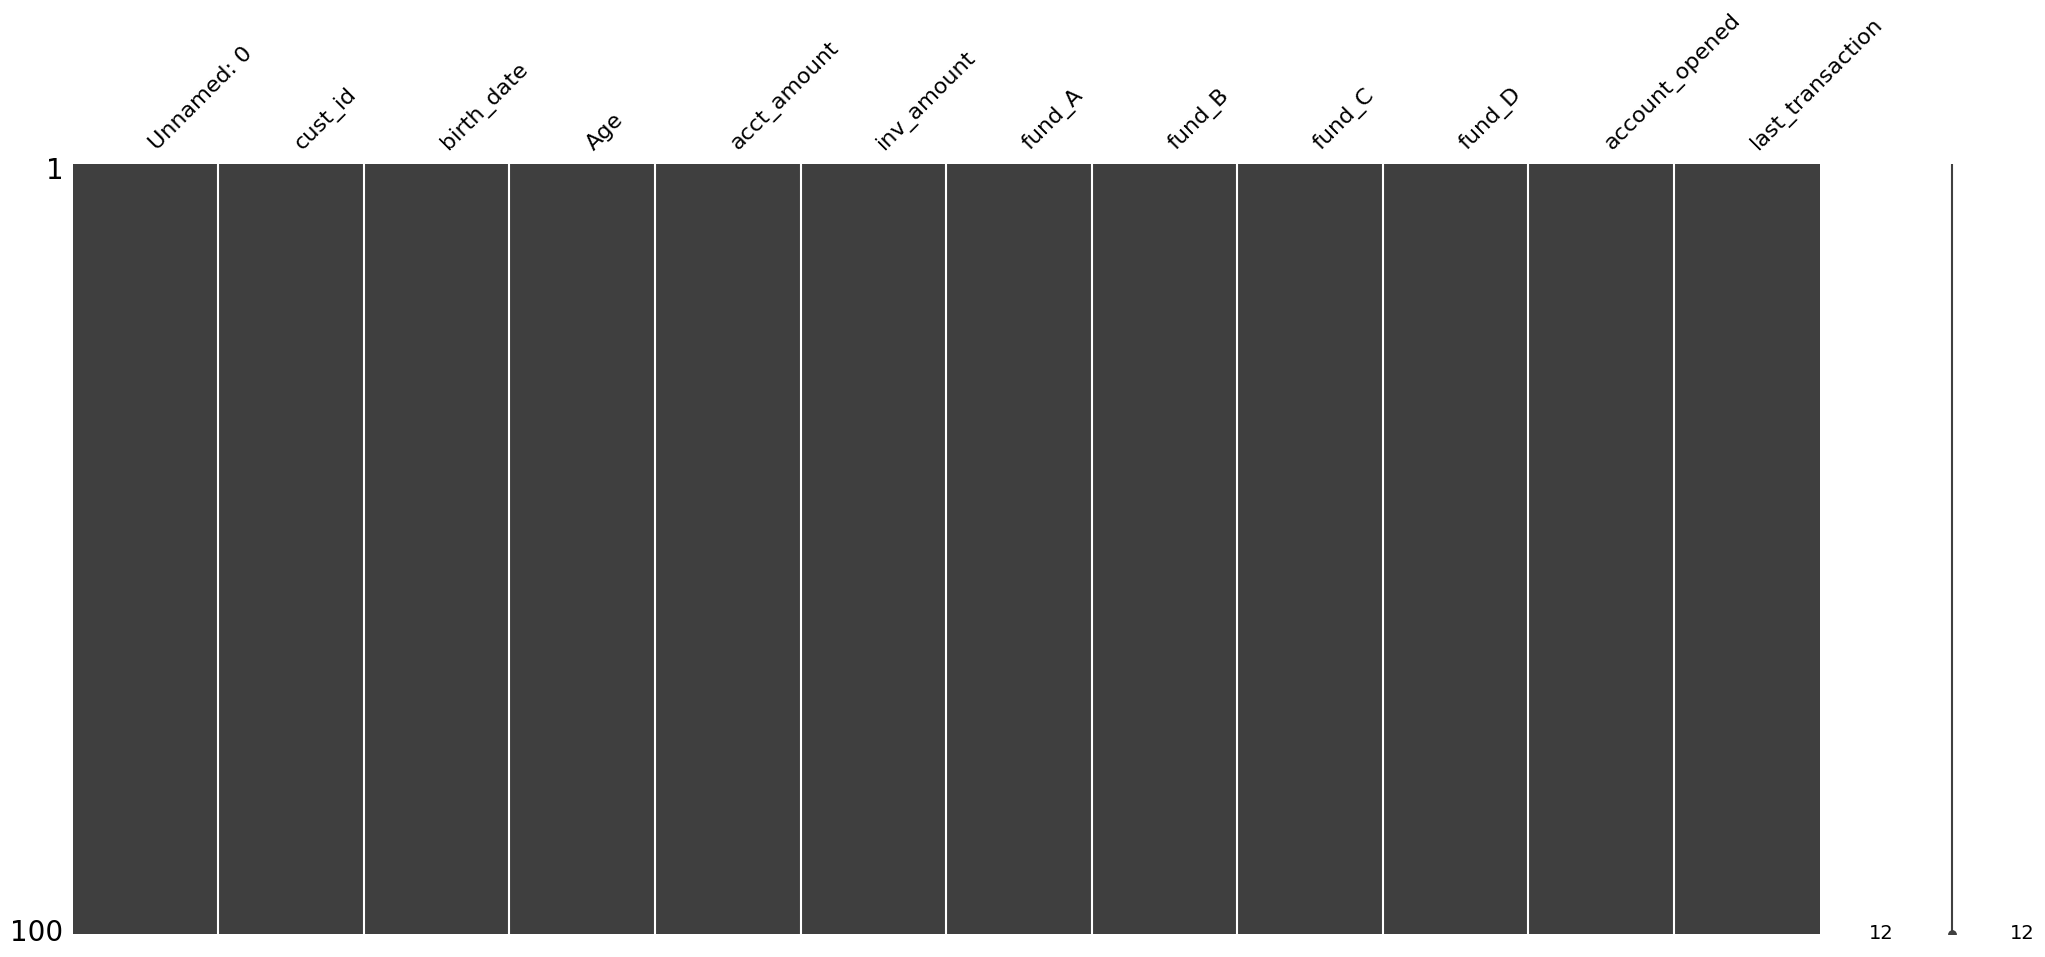

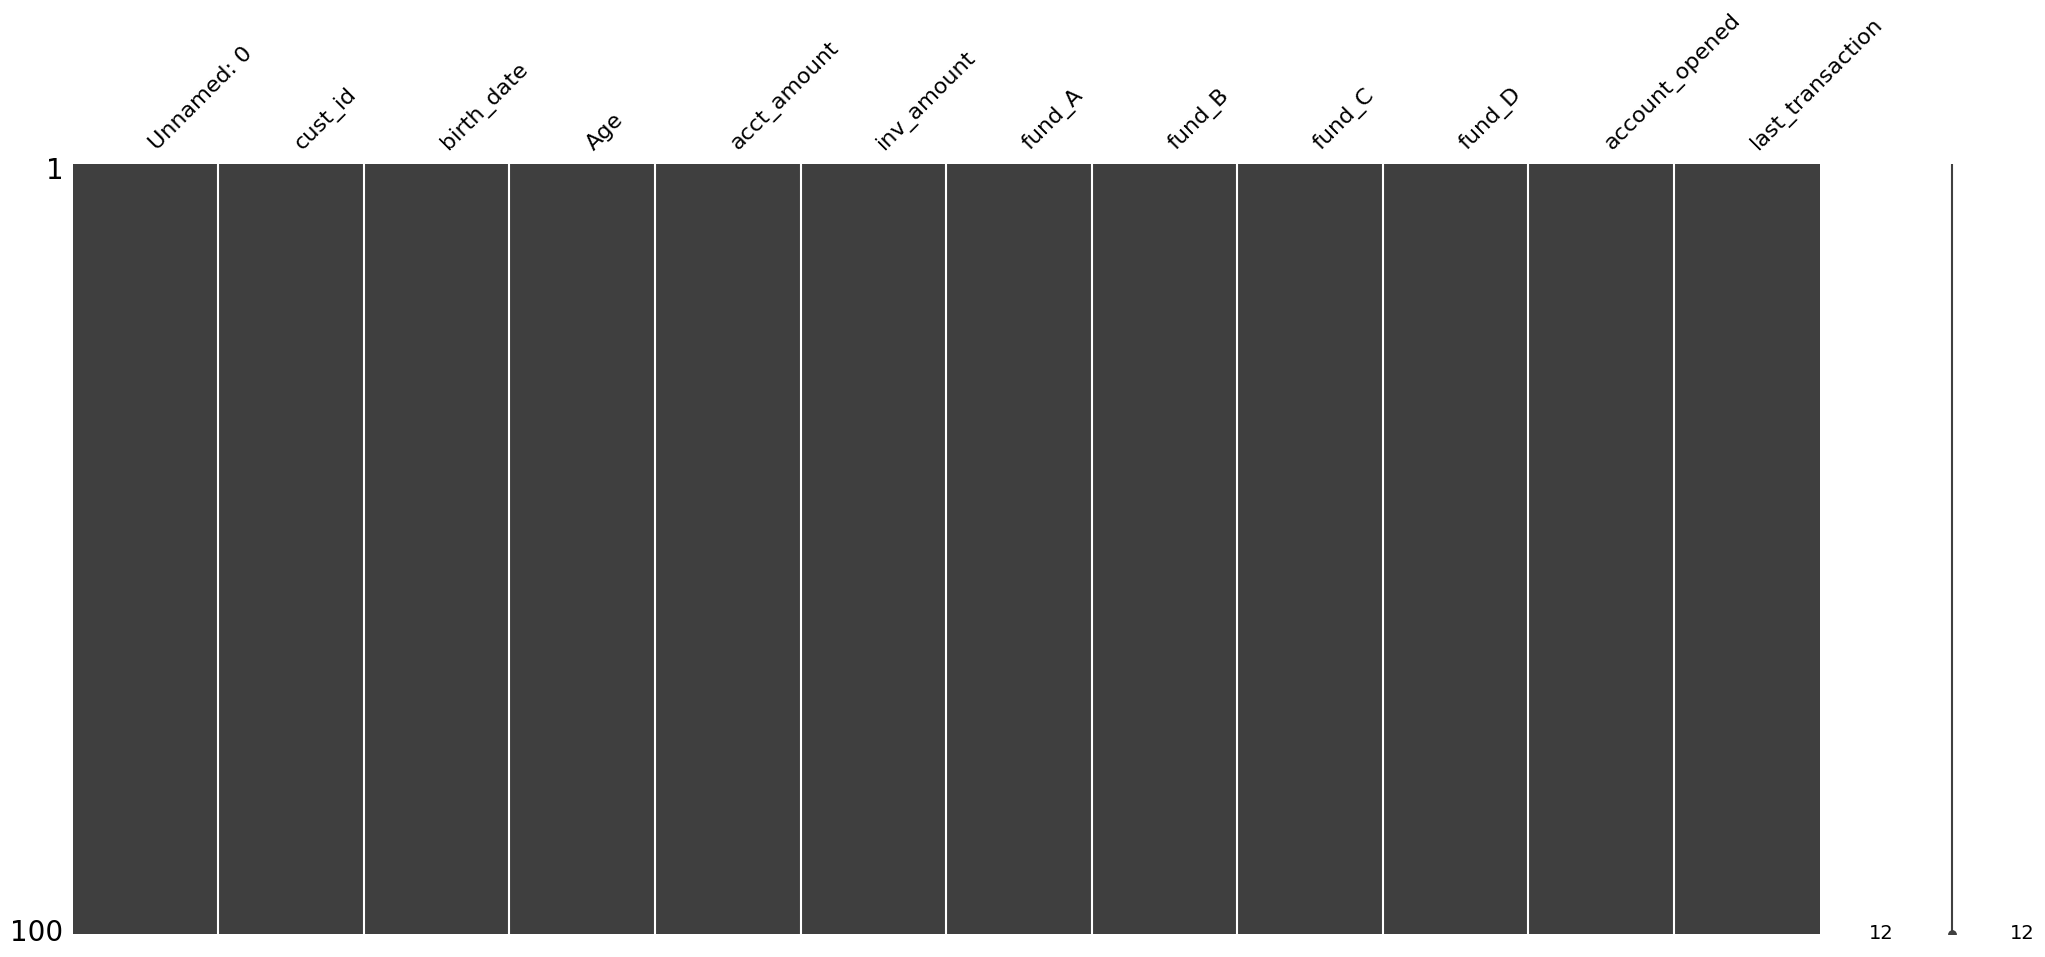

In [6]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]
# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='Age')
msno.matrix(banking_sorted)
plt.show()

# Follow the money  

In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.

## Instructions

- Use .dropna() to drop missing values of the cust_id column in banking and store the results in banking_fullid.
- Use inv_amount to compute the estimated account amounts for banking_fullid by setting the amounts equal to inv_amount * 5, and assign the results to acct_imp.
- Impute the missing values of acct_amount in banking_fullid with the newly created acct_imp using .fillna().

In [7]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])


# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


# Comparing Strings

Minimum edit distance is a systematic way to identify how close two strings are. For example, let's take a look at the following two words: intention, and execution. The minimum edit distance between them is the least possible amount of steps, that could get us from the word intention to execution, with the available operations being

- inserting new characters, 
- deleting them, 
- substituting them, and 
- transposing consecutive characters.

### To get from intention to execution,

We first start off by deleting I from intention, and adding C between E and N. Our minimum edit distance so far is 2, since these are two operations. Then we substitute the first N with E, T with X, and N with U, leading us to execution! With the minimum edit distance being 5. The lower the edit distance, the closer two words are. For example, the two different typos of reading have a minimum edit distance of 1 between them and reading.

## Minimum edit distance algorithms

There's a variety of algorithms based on edit distance that differ on which operations they use, how much weight attributed to each operation, which type of strings they're suited for and more, with a variety of packages to get each similarity. 

|Algorithm     |Operations|
|-------       |----------|
|Damerau-Levenshtein      |insertion, substitution, deletion, transposition|
|Levenshtein      |insertion, substitution, deletion|
|Hamming           |substitution|
|Jaro distance       |transposition only|

Possible packages: `nlkt`, `thefuzz`, `textdistance`  

For this lesson, we'll be comparing strings using Levenshtein distance since it's the most general form of string matching by using the `thefuzz` package.  
`thefuzz` is a package to perform string comparison. 
# Simple string compaarison

`from thefuzz import fuzz`  
#which allow us to compare between single strings. 
#compare reading vs reeding  
`fuzz.Wratio('Reeding', 'Reading')`  
#Here we use fuzz's WRatio function to compute the similarity between reading and its typo, inputting each string as an argument. 

For any comparison function using thefuzz, our output is a score from **0** to **100** with **0** being not similar at all, **100 **being an exact match. Do not confuse this with the minimum edit distance score from earlier, where a lower minimum edit distance means a closer match.  

# Partial strings and different orderings

The `fuzz.WRatio` function is highly robust against partial string comparison with different orderings.   
#For example here we compare the strings Houston Rockets and Rockets, and still receive a high similarity score of 96.  

#Partial string comparison
`fuzz.Wratio('Houston Rockets', 'Rockets')`  
#Partial string comparison with different order  
`fuzz.Wratio('Houston Rockets vs Los Angeles Lakers', 'Lakers vs Rockets')`  

The same can be said for the strings Houston Rockets vs Los Angeles Lakers and Lakers vs Rockets, where the team names are only partial and they are differently ordered.  
## Comparison with arrays
We can also compare a string with an array of strings by using the `extract` function from the `process` module from `fuzzy` wuzzy. `extract` takes in a string, an array of strings, and the number of possible matches to return ranked from highest to lowest. It returns a list of tuples with 3 elements, the first one being the matching string being returned, the second one being its similarity score, and the third one being its index in the array.  
#import the process  
`from thefuzz import process`  
#Define strings and array of possible matches  
`string = 'Houston Rockets vs Los Angeles Lakers'`  
`choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets', 'Houson vs Los Angeles', 'Heat vs Bulls'])`  
`process.extract(string, choices, limit = 2)`  

# Collapsing categories with string similarity

In chapter 2, we learned that collapsing data into categories is an essential aspect of working with categorical and text data, and we saw how to manually replace categories in a column of a DataFrame. 
use .replace() to collapse `"eur"` into `"Europe"` 
But what if we had so many inconsistent categories that a manual replacement is simply not feasible?  

`"EU"`, `"eur"`, `"Europ"`, `"Europa"`, `"Erope"`, `"Evropa"`, ...  
We can easily do that with string similarity!  

Say we have DataFrame named survey containing answers from respondents from the state of New York and California asking them how likely are you to move on a scale of 0 to 5. 
`print(survey['state'].unique())` 

|id    |State|
|--    |-----|
|0     |California|
|1     |Cali|
|2     |Calefornia|
|3     |Calefornie|
|4     |Californie|
|5     |Calfornia|
|6     |Calefernia|
|7     |New York|
|8     |New York City|

The state field was free text and contains hundreds of typos. Remapping them manually would take a huge amount of time. Instead, we'll use string similarity. We also have a category DataFrame containing the correct categories for each state. Let's collapse the incorrect categories with string matching!  
#collapsing all state

`# For each correct category`
`for state in categories['state']:`  
    `# Find potential matches in states with typos`  
    `matches = process.extract(state, survey['state'], limit = survey.shape[0])`  
    `# for each potential match`  
    `for potential_match in matches:`  
        `#if high similarity score`  
        `if potential_match[1] >= 80:`  
            `# Replace typo with correct category`  
            `survey.loc[survey['state'] == potential_match[0], 'state'] = state`  
            
# Record linkage

Record linkage attempts to join data sources that have similarly fuzzy duplicate values, so that we end up with a final DataFrame with no duplicates by using string similarity. We'll cover record linkage in more detail in the next couple of lessons.   

|Event   |Time     |Event      |Time|
|-----   |----     |-----      |----| 
|Houston Rockets vs Chicago Bulls   |19:00     |NBA: Nets vs Magic        |8pm|
|Miami Heats vs Los Angeles Lakers   |19:00    |NBA: Bulls vs Rockets        |9pm|
|Brooklyn Nets vs Orlando Magic      |20:00    |NBA: Heats vs Lakers        |7pm|
|Denver Nuggets vs Miami Heat        |21:00    |NBA: Grizzles vs Heat        |10pm|
|San ANtonio Spurs vs Atlanta Hawks   |21:00    |NBA: Heat vs Cavaliers        |9pm|



In [ ]:
# For each correct category
for state in categories['state']:  
    # Find potential matches in states with typos  
    matches = process.extract(state, survey['state'], limit = survey.shape[0])  
    # for each potential match  
    for potential_match in matches:  
        #if high similarity score  
        if potential_match[1] >= 80:  
            # Replace typo with correct category  
            survey.loc[survey['state'] == potential_match[0], 'state'] = state  

# The cutoff point
In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of restaurants has been collected from many sources, where the cuisine_type column is riddled with typos, and should contain only italian, american and asian cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the thefuzz's process.extract() function by finding the similarity score of the most distant typo of each category.

## Instructions   

- Import process from thefuzz.
- Store the unique cuisine_types into unique_types.
- Calculate the similarity of 'asian', 'american', and 'italian' to all possible cuisine_types using process.extract(), while returning all possible matches.
- Take a look at the output, what do you think should be the similarity cutoff point when remapping categories?

In [4]:
# Import process from thefuzz
from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('indonesian', 72), ('italian', 67), ('russian', 67), ('american', 62), ('californian', 54), ('japanese', 54), ('mexican/tex-mex', 54), ('american ( new )', 54), ('mexican', 50), ('cajun/creole', 36), ('middle eastern', 36), ('vietnamese', 36), ('pacific new wave', 36), ('fast food', 36), ('chicken', 33), ('hamburgers', 27), ('hot dogs', 26), ('coffeebar', 26), ('continental', 26), ('steakhouses', 25), ('southern/soul', 22), ('delis', 20), ('eclectic', 20), ('pizza', 20), ('health food', 19), ('diners', 18), ('coffee shops', 18), ('noodle shops', 18), ('french ( new )', 18), ('desserts', 18), ('seafood', 17), ('chinese', 17)]
[('american', 100), ('american ( new )', 90), ('mexican', 80), ('mexican/tex-mex', 68), ('asian', 62), ('italian', 53), ('russian', 53), ('middle eastern', 51), ('pacific new wave', 45), ('hamburgers', 44), ('indonesian', 44), ('chicken', 40), ('southern/soul', 39), ('japanese', 38), ('eclectic', 38), ('delis', 36), ('pizza', 36), ('cajun/creole',

# Remapping categories II
In the last exercise, you determined that the distance cutoff point for remapping typos of 'american', 'asian', and 'italian' cuisine types stored in the cuisine_type column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using fuzywuzzy.process's extract() function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using process.extract(), the output is a list of tuples where each is formatted like:

(closest match, similarity score, index of match)
The restaurants DataFrame is in your environment, and you have access to a categories list containing the correct cuisine types ('italian', 'asian', and 'american').

## Instructions 

- Return all of the unique values in the cuisine_type column of restaurants.
- Now you're getting somewhere! Now you can iterate through matches to reassign similar entries.
- Within the for loop, use an if statement to check whether the similarity score in each match is greater than or equal to 80.
- If it is, use .loc to select rows where cuisine_type in restaurants is equal to the current match (which is the first element of match), and reassign them to be 'italian'.
- Finally, you'll adapt your code to work with every restaurant type in categories.
- Using the variable cuisine to iterate through categories, embed your code from the previous step in an outer for loop.
- Inspect the final result. This has been done for you.

In [5]:
# Inspect the unique values of the cuisine_type column
print(restaurants['type'].unique())
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['type'], limit = len(restaurants['type']))

# Inspect the first 5 matches
print(matches[0:5])

# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['type'], limit=len(restaurants.type))

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >= 80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants['type'] == match[0], 'type'] = 'italian'
 
#Define categories
categories = ['italian', 'asian', 'american']
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['type'], limit=len(restaurants.type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['type'].unique())    

['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'mexican' 'middle eastern'
 'asian' 'vietnamese' 'health food' 'american ( new )' 'pacific new wave'
 'indonesian' 'eclectic' 'chicken' 'fast food' 'southern/soul' 'coffeebar'
 'continental' 'french ( new )' 'desserts' 'chinese' 'pizza']
[('italian', 100, 14), ('italian', 100, 21), ('italian', 100, 47), ('italian', 100, 57), ('italian', 100, 73)]
['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'middle eastern' 'asian'
 'vietnamese' 'health food' 'pacific new wave' 'indonesian' 'eclectic'
 'chicken' 'fast food' 'southern/soul' 'coffeebar' 'continental'
 'french ( new )' 'desserts' 'chinese' 'pizza']


# Generating Points
## Record Linkage
Record linkage is the act of linking data from different sources regarding the same entity. Generally, we 
- clean two or more DataFrames, 
- generate pairs of potentially matching records, 
- comppare pairs
- score these pairs according to string similarity and other similarity metrics, and 
- link them. 

All of these steps can be achieved with the `recordlinkage` package.

Here we have two DataFrames, census_A, and census_B, containing data on individuals throughout the states.  

census_A

|        | given_name       |surname      |date_of_birth        |suburb       |state        |address_i|
|------   |----------       |-------      |-------------        |-------      |-----        |---------|
|rec_id  |                  |             |                     |             |             |         |     
|rec_1070_org    |michaela   |neuman      |19151111             |winston hills   |cal       |stanley street|
|rec_1016_org    |courtney   |painter      |19161214             |richlands   |txt       |pinkerton circuit|


census_B

|        | given_name       |surname      |date_of_birth        |suburb       |state        |address_i|
|------   |----------       |-------      |-------------        |-------      |-----        |---------|
|rec_id  |                  |             |                     |             |             |         |     
|rec_561_dup_0    |elton   |NaN      |1951013            |windermere   |ny       |light setreet|
|rec_2642_dup_0    |mitchell   |maxon      |19390212             |north ryde   |cal       |edkins street|


We want to merge them while avoiding duplication using record linkage, since they are collected manually and are prone to typos, there are no consistent IDs between them.
We first want to generate pairs between both DataFrames. Ideally, we want to generate all possible pairs between our DataFrames. But what if we had big DataFrames and ended up having to generate millions if not billions of pairs? It wouldn't prove scalable and could seriously hamper development time.

### Blocking

This is where we apply what we call blocking, which creates pairs based on a matching column, which is in this case, the state column, reducing the number of possible pairs.

## Generating Pairs

`import recordlinkage`  
`#create indexing object`  
`indexer = recordlinkage.Index()`  
## Generate pairs blocked on state
`indexer.block('state')`  
`pairs = indexer.index(census_A, census_B)`  
`print(pairs)`  

## Comparing DataFrames

`#Generate the pairs`  
`pairs = indexer.index(census_A, census_B)`  
`#create a compare object`  
`compare_cl = recordlinkage.Compare()`  
`#Find exact matches for pairs of date_of_birth and state`  
`compare_cl.exact('date_of_birth', 'date_of_birth', label = 'date_of_birth')`  
`compare_cl.exact('state', 'state', label='state')`  
`#Find similar matches for pairs of surname and address_i using string similarity`  
`compare_cl.string('surname', 'surname', threshold = 0.85, label = 'surname')`  
`compare_cl.string('address_1', 'address_1', threshold = 0.85, label = 'address_1')`  
`#Find matches`  
`potential_matches = compare_cl.compute(pairs, census_A, census_B)`  
`print(potential_matches)`  
#Finding the only pairs we want  
`potential_matches[potential_matches.sum(axis=1) => 2]`  

# Pairs of restaurants
In the last lesson, you cleaned the restaurants dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named restaurants_new with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the cuisine_type and city columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with restaurants.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between restaurants and restaurants_new. Both DataFrames, pandas and recordlinkage are in your environment.

## Instructions 

- Instantiate an indexing object by using the Index() function from recordlinkage.
- Block your pairing on cuisine_type by using indexer's' .block() method.
- Generate pairs by indexing restaurants and restaurants_new in that order.

In [8]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

# Similar restaurants  

In the last exercise, you generated pairs between restaurants and restaurants_new in an effort to cleanly merge both DataFrames using record linkage.

When performing record linkage, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in pairs, you will find exact matches in the city and cuisine_type columns between each pair, and similar strings for each pair in the rest_name column. Both DataFrames, pandas and recordlinkage are in your environment.

## Instructions 

- Instantiate a comparison object using the recordlinkage.Compare() function.
- Use the appropriate comp_cl method to find exact matches between the city and cuisine_type columns of both DataFrames.
- Use the appropriate comp_cl method to find similar strings with a 0.8 similarity threshold in the rest_name column of both DataFrames.
- Compute the comparison of the pairs by using the .compute() method of comp_cl.

In [9]:
#import package
import recordlinkage
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('type', 'type', label = 'type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8) 
# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

<Compare>

# Linking DataFrames  
Remeber our census data from the previous video

census_A

|        | given_name       |surname      |date_of_birth        |suburb       |state        |address_i|
|------   |----------       |-------      |-------------        |-------      |-----        |---------|
|rec_id  |                  |             |                     |             |             |         |     
|rec_1070_org    |michaela   |neuman      |19151111             |winston hills   |cal       |stanley street|
|rec_1016_org    |courtney   |painter      |19161214             |richlands   |txt       |pinkerton circuit|


census_B

|        | given_name       |surname      |date_of_birth        |suburb       |state        |address_i|
|------   |----------       |-------      |-------------        |-------      |-----        |---------|
|rec_id  |                  |             |                     |             |             |         |     
|rec_561_dup_0    |elton   |NaN      |1951013            |windermere   |ny       |light setreet|
|rec_2642_dup_0    |mitchell   |maxon      |19390212             |north ryde   |cal       |edkins street|

# What we've already done

`#Import recordlinkage and generate pairs`  
`import recordlinkage`    
`indexer = recordlinkage.Index()`  
`indexer.block('stae')`  
`full_pairs = indexer.index(census_A, census_B)`  

# Comparison step
`compare_cl = recorlinkage.Compare()`  
`compare_cl.exact('date_of_birth', 'date_of_birth', label = 'date_of_birth')`  
`compare_cl.exact('state', 'state', label='state')`  
`compare_cl.string('address_1', 'address_1', threshold=0.85, label='address_1')`
`potential_matches = compare_cl.compute(full_pairs, census_A, census_B)`  

Looking at the potential matches, we see that it is a multi-index DataFrame, where we have two index columns, record id 1, and record id 2. The first index column, stores indices from census A. The second index column, stores all possible indices from census_B, for each row index of census_A.  The columns of our potential matches are the columns we chose to link both DataFrames on, where the value is 1 for a match, and 0 otherwise.  
## Steps in linking dataframes 
- Isolate: The first step in linking DataFrames, is to isolate the potentially matching pairs to the ones we're pretty sure of. We saw how to do this in the previous lesson, by subsetting the rows where the row sum is above a certain number of columns, in this case 3. The output is row indices between census A and census B that are most likely duplicates.  
### Probable matches
`matches = potential_matches[potential_matches.sum(axis=1) >= 3]`
`print(matches)`
- Extract: Our next step is to extract the one of the index columns, and subsetting its associated DataFrame to filter for duplicates.

### Get the indices
We can access a DataFrame's index using the index attribute.   
`matches.index`  
Since this is a multi index DataFrame, it returns a multi index object containing pairs of row indices from census_A and census_B respectively. 

### Get indices from census_B only
`duplicate_rows = matches.index.get_level_values(1)`  

We want to extract all census_B indices, so we chain it with the get_level_values method, which takes in which column index we want to extract its values. We can either input the index column's name, or its order, which is in this case 1.

## Linking DataFrames

To find the duplicates in census B, we simply subset on all indices of census_B, with the ones found through record linkage. 
### #Finding Duplicates in census_B  
`census_B_duplicates = census_B[census_B.index.isin(duplicate_rows)]`  

You can choose to examine them further for similarity with their duplicates in census_A, but if you're sure of your analysis, you can go ahead and find the non duplicates by repeating the exact same line of code, except by adding a tilde at the beginning of your subset.  
### #Finding new rows in census_B  
`census_B_new = census_B[~census_B.index.isin(duplicate_rows)]`  
Now that you have your non duplicates, all you need is a simple append using the DataFrame append method of census A, and you have your linked Data!  
### Link the DataFrame 
`full_census = census_A.append(census_B_new)`

# Linking them together!
In the last lesson, you've finished the bulk of the work on your effort to link restaurants and restaurants_new. You've generated the different pairs of potentially matching rows, searched for exact matches between the cuisine_type and city columns, but compared for similar strings in the rest_name column. You stored the DataFrame containing the scores in potential_matches.

Now it's finally time to link both DataFrames. You will do so by first extracting all row indices of restaurants_new that are matching across the columns mentioned above from potential_matches. Then you will subset restaurants_new on these indices, then append the non-duplicate values to restaurants. All DataFrames are in your environment, alongside pandas imported as pd.

## Instructions

- Isolate instances of potential_matches where the row sum is above or equal to 3 by using the .sum() method.
- Extract the second column index from matches, which represents row indices of matching record from restaurants_new by using the .get_level_values() method.
- Subset restaurants_new for rows that are not in matching_indices.
- Append non_dup to restaurants.

In [ ]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis=1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)